# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

plt.style.use("fivethirtyeight")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("crime_reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310629 entries, 0 to 2310628
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21061
Address                             12
Zip Code                         14242
Council District                 47179
APD Sector                        9054
APD District                      9533
PRA                              10804
Census Tract                   1604795
Clearance Status                606865
Clearance Date                  337663
UCR Category                   1521983
Category Description           1521983
X-coordinate                     10218
Y-coordinate                     10218
Latitude                         39047
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2310624,20051351973,AGG ROBBERY/DEADLY WEAPON,300,N,05/15/2005 10:12:00 PM,05/15/2005,2212.0,05/15/2005 10:12:00 PM,05/15/2005,2212.0,RESIDENCE / HOME,9900 ROXANNA DR,78748.0,5.0,FR,1,535.0,NaN,NaN,06/07/2005,120,Robbery,3088209.0,3088209.0,30.175423,-97.827921,"(30.17542262, -97.82792124)"
2310625,20215004025,CRIMINAL MISCHIEF,1400,N,01/27/2021 12:00:00 AM,01/27/2021,0.0,01/28/2021 08:35:00 PM,01/28/2021,2035.0,RESIDENCE / HOME,908 WILLOW ST,78702.0,3.0,CH,1,409.0,NaN,N,02/16/2021,NaN,NaN,3116789.0,3116789.0,30.260061,-97.735177,"(30.26006069, -97.7351768)"
2310626,2021491333,DEADLY CONDUCT,408,N,02/18/2021 09:18:00 PM,02/18/2021,2118.0,02/18/2021 09:18:00 PM,02/18/2021,2118.0,RESIDENCE / HOME,1303 BONNIE BRAE,78753.0,4.0,ED,7,241.0,NaN,NaN,NaN,13A,Aggravated Assault,3134446.0,3134446.0,30.357352,-97.676557,"(30.35735244, -97.67655721)"
2310627,20115038767,THEFT,600,N,08/14/2011 10:00:00 PM,08/14/2011,2200.0,08/15/2011 07:13:00 AM,08/15/2011,713.0,RESIDENCE / HOME,1143 SALINA ST,78702.0,1.0,CH,2,412.0,NaN,N,09/12/2011,23H,Theft,3121465.0,3121465.0,30.268946,-97.720121,"(30.26894617, -97.72012148)"
2310628,20215003780,CRIMINAL MISCHIEF,1400,N,01/27/2021 11:27:00 AM,01/27/2021,1127.0,01/27/2021 01:24:00 PM,01/27/2021,1324.0,RESIDENCE / HOME,2500 BURLESON RD,78741.0,3.0,HE,2,482.0,NaN,N,02/16/2021,NaN,NaN,3116823.0,3116823.0,30.228670,-97.735914,"(30.22866955, -97.73591358)"


## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Incident Number",
        "Occurred Time",
        "Occurred Date Time",
        "Highest Offense Code",
        "Census Tract",
        "PRA",
        "Report Date",
        "Report Time",
        "UCR Category",
        "Category Description",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "clearance_status",
    ]
    df[fillna].fillna("N/A", inplace=True)
    date_col = ["occurred_date", "report_date_time", "clearance_date"]
    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[date_col] = df[date_col].astype("datetime64")
    df[cat_col] = df[cat_col].astype("category")
    df["year"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.day
    df.set_index(["occurred_date"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [5]:
# Checking for and removing any duplicates
df.duplicated().sum()

828

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# Re-examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2309801 entries, 2003-01-01 to 2021-02-20
Data columns (total 17 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   clearance_status             object        
 10  clearance_date               datetime64[ns]
 11  latitude                     float64       
 12  longitude                    float64       
 13  year                         int64         
 14  month                        int64         
 15  week                         int64

None

highest_offense_description         0
family_violence                     0
report_date_time                    1
location_type                   21050
address                            12
zip_code                        14237
council_district                47161
apd_sector                       9050
apd_district                     9529
clearance_status               606631
clearance_date                 337504
latitude                        39019
longitude                       39019
year                                0
month                               0
week                                0
day                                 0
dtype: int64

,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2003-01-01,ASSAULT W/INJURY-FAM/DATE VIOL,Y,2003-01-01 22:05:00,RESIDENCE / HOME,6921 THORNCLIFFE DR,78731.0,10.0,BA,8,C,2003-01-06,30.353785,-97.760046,2003,1,1,1
2003-01-01,IDENTITY THEFT,N,2012-01-23 09:41:00,SPECIALTY STORE (TV FUR ETC.),1533 CUTTING HORSE LN,78727.0,7.0,ED,4,N,2012-01-23,30.416668,-97.683656,2003,1,1,1
2003-01-01,BURGLARY OF VEHICLE,N,2003-01-01 08:16:00,PARKING LOTS / GARAGE,8524 BURNET RD,78757.0,7.0,BA,6,N,NaT,30.366942,-97.728403,2003,1,1,1
2003-01-01,INDECENCY WITH A CHILD/CONTACT,N,2003-03-21 10:31:00,RESIDENCE / HOME,400 BLOCK W ST ELMO RD,78745.0,3.0,DA,3,O,2004-01-13,NaN,NaN,2003,1,1,1
2003-01-01,IDENTITY THEFT,N,2008-12-02 12:37:00,RESIDENCE / HOME,9920 QUAIL BLVD,78758.0,4.0,ED,1,N,2008-12-08,30.372425,-97.700049,2003,1,1,1


,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2021-02-20,AGG ROBBERY/DEADLY WEAPON,N,2021-02-20 12:18:00,STREETS / HWY / ROAD / ALLEY,901 NECHES ST,78701.0,9.0,GE,1,C,2021-02-20,30.269733,-97.736929,2021,2,7,20
2021-02-20,THEFT,N,2021-02-20 23:22:00,RESIDENCE / HOME,1656 RUTLAND DR,78758.0,4.0,ED,2,NaN,NaT,30.373595,-97.711129,2021,2,7,20
2021-02-20,BURGLARY OF VEHICLE,N,2021-02-20 23:35:00,RESTAURANTS,6319 N IH 35 SVRD NB,78752.0,4.0,ID,1,NaN,NaT,30.325306,-97.705165,2021,2,7,20
2021-02-20,AUTO THEFT,N,2021-02-20 00:39:00,PARKING LOTS / GARAGE,10107 RUTLAND VILLAGE EAST,78758.0,4.0,ED,2,NaN,NaT,30.378653,-97.709389,2021,2,7,20
2021-02-20,CRIMINAL MISCHIEF,N,2021-02-20 14:41:00,CONVENIENCE STORE,10111 N LAMAR BLVD,78753.0,4.0,ED,1,NaN,NaT,30.370782,-97.692259,2021,2,7,20


## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

78741.0    207345
78753.0    179578
78701.0    168752
78758.0    159955
78704.0    155159
78745.0    151330
78702.0    137068
78744.0    126736
78723.0    118843
78752.0     84753
78748.0     68433
78759.0     66611
78751.0     64315
78757.0     58165
78705.0     57326
78721.0     47884
78749.0     40567
78724.0     37800
78727.0     36008
78703.0     35301
78731.0     28772
78746.0     28189
78729.0     25395
78750.0     23818
78754.0     22978
Name: zip_code, dtype: int64

78741.0    0.090324
78753.0    0.078228
78701.0    0.073512
78758.0    0.069680
78704.0    0.067591
78745.0    0.065923
78702.0    0.059710
78744.0    0.055209
78723.0    0.051771
78752.0    0.036920
78748.0    0.029811
78759.0    0.029017
78751.0    0.028017
78757.0    0.025338
78705.0    0.024973
78721.0    0.020859
78749.0    0.017672
78724.0    0.016467
78727.0    0.015686
78703.0    0.015378
78731.0    0.012534
78746.0    0.012280
78729.0    0.011063
78750.0    0.010376
78754.0    0.010010
Name: zip_code, dtype: float64

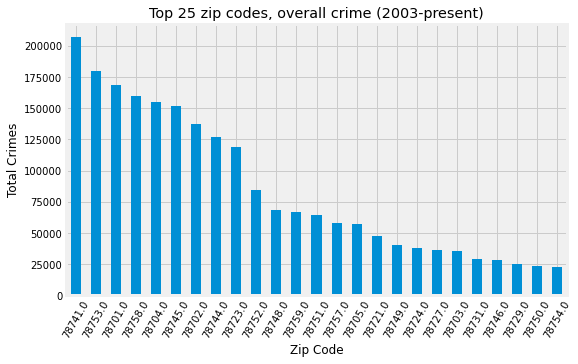

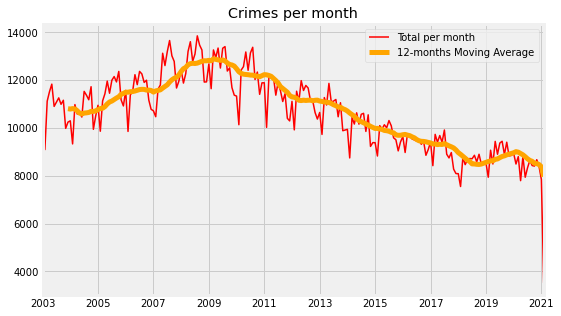

In [8]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25))
display(df.zip_code.value_counts(normalize=True).head(25))

# Visualizing the top 25 crime-ridden zip codes in Austin
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(8, 5),
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 5))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

BURGLARY OF VEHICLE               231367
THEFT                             212068
FAMILY DISTURBANCE                180092
CRIMINAL MISCHIEF                 127794
ASSAULT W/INJURY-FAM/DATE VIOL     78253
BURGLARY OF RESIDENCE              77185
DWI                                69710
PUBLIC INTOXICATION                68794
HARASSMENT                         64425
DISTURBANCE - OTHER                61783
Name: highest_offense_description, dtype: int64

,BURGLARY OF VEHICLE,ASSAULT W/INJURY-FAM/DATE VIOL,PUBLIC INTOXICATION,CRIMINAL MISCHIEF,BURGLARY OF RESIDENCE,DWI,FAMILY DISTURBANCE,HARASSMENT,TOTAL
occurred_date,,,,,,,,,
2020-10-31,420,253,74,551,163,196,881,205,2743
2020-11-30,482,282,71,507,162,183,864,234,2785
2020-12-31,414,253,50,477,187,166,825,247,2619
2021-01-31,371,254,55,430,127,170,816,243,2466
2021-02-28,192,143,31,177,60,69,400,100,1172


<Figure size 432x288 with 0 Axes>

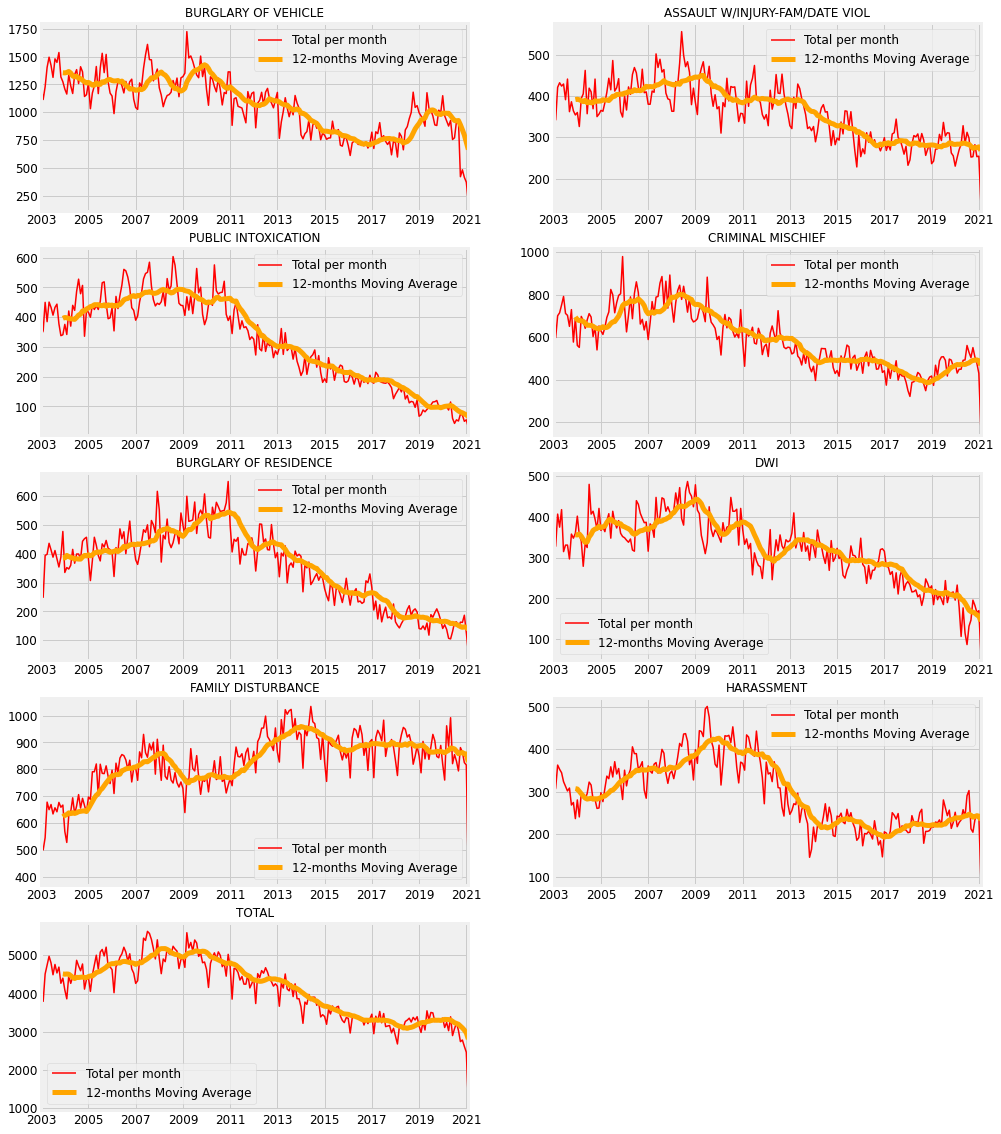

In [9]:
display(df["highest_offense_description"].value_counts().head(10))

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly.tail())

plt.figure(1)
plt.figure(figsize=(15, 20))

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

PUBLIC INTOXICATION               17154
THEFT                             15794
BURGLARY OF VEHICLE                9274
WARRANT ARREST NON TRAFFIC         8966
DWI                                8326
ASSAULT WITH INJURY                7543
VIOL CITY ORDINANCE - OTHER        6187
POSS OF DRUG PARAPHERNALIA         6049
CRIMINAL MISCHIEF                  5836
CRIMINAL TRESPASS                  3922
POSSESSION OF MARIJUANA            3386
DISTURBANCE - OTHER                3362
CUSTODY ARREST TRAFFIC WARR        2993
POSS CONTROLLED SUB/NARCOTIC       2903
CAMPING IN PARK                    2785
VOCO - ALCOHOL  CONSUMPTION        2690
ASSAULT BY CONTACT                 2595
CRIMINAL TRESPASS/TRANSIENT        2585
THEFT OF BICYCLE                   2516
URINATING IN PUBLIC PLACE          2336
FAMILY DISTURBANCE                 2172
DOC FIGHTING                       2111
PROTECTIVE ORDER                   2099
ASSAULT W/INJURY-FAM/DATE VIOL     1732
Name: highest_offense_description, dtype

PUBLIC INTOXICATION               0.101652
THEFT                             0.093593
BURGLARY OF VEHICLE               0.054956
WARRANT ARREST NON TRAFFIC        0.053131
DWI                               0.049339
ASSAULT WITH INJURY               0.044699
VIOL CITY ORDINANCE - OTHER       0.036663
POSS OF DRUG PARAPHERNALIA        0.035846
CRIMINAL MISCHIEF                 0.034583
CRIMINAL TRESPASS                 0.023241
POSSESSION OF MARIJUANA           0.020065
DISTURBANCE - OTHER               0.019923
CUSTODY ARREST TRAFFIC WARR       0.017736
POSS CONTROLLED SUB/NARCOTIC      0.017203
CAMPING IN PARK                   0.016504
VOCO - ALCOHOL  CONSUMPTION       0.015941
ASSAULT BY CONTACT                0.015378
CRIMINAL TRESPASS/TRANSIENT       0.015318
THEFT OF BICYCLE                  0.014909
URINATING IN PUBLIC PLACE         0.013843
FAMILY DISTURBANCE                0.012871
DOC FIGHTING                      0.012509
PROTECTIVE ORDER                  0.012438
ASSAULT W/I

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

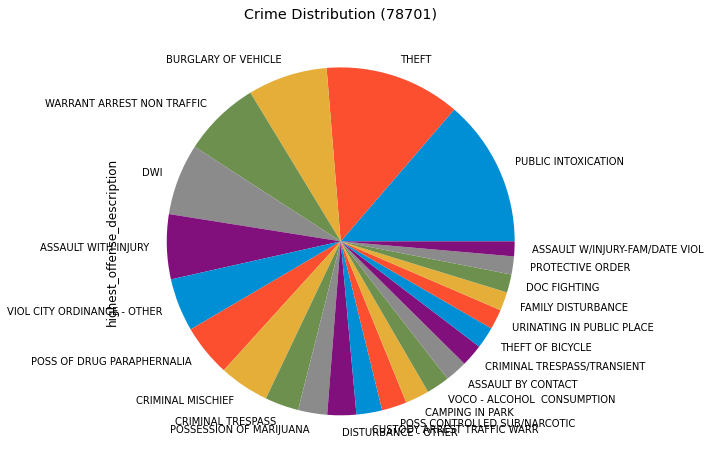

In [10]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off)
display(df_01.highest_offense_description.value_counts(normalize=True).head(24))
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

THEFT                             17174
BURGLARY OF VEHICLE               15953
FAMILY DISTURBANCE                14697
CRIMINAL MISCHIEF                  9483
THEFT BY SHOPLIFTING               7639
ASSAULT W/INJURY-FAM/DATE VIOL     7180
BURGLARY OF RESIDENCE              6076
DWI                                5032
DISTURBANCE - OTHER                4778
CUSTODY ARREST TRAFFIC WARR        4349
HARASSMENT                         4265
AUTO THEFT                         4243
POSS OF DRUG PARAPHERNALIA         3729
PUBLIC INTOXICATION                3371
ASSAULT WITH INJURY                3316
CRIMINAL TRESPASS                  3150
POSS CONTROLLED SUB/NARCOTIC       2982
RUNAWAY CHILD                      2935
WARRANT ARREST NON TRAFFIC         2797
POSSESSION OF MARIJUANA            2710
BURGLARY NON RESIDENCE             2491
VIOL CITY ORDINANCE - OTHER        1868
Name: highest_offense_description, dtype: int64
----------------------------------
THEFT                             0.0

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

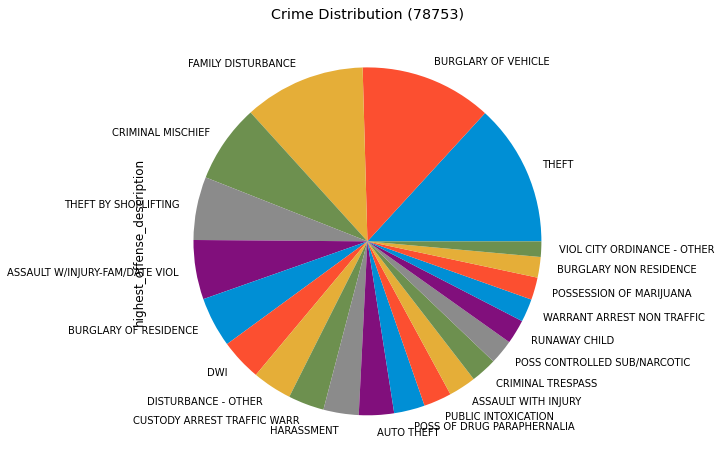

In [11]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
print(df_53_off)
print("----------------------------------")
print(df_53.highest_offense_description.value_counts(normalize=True).head(22))
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

FAMILY DISTURBANCE                20417
BURGLARY OF VEHICLE               19825
THEFT                             15612
CRIMINAL MISCHIEF                 11066
ASSAULT W/INJURY-FAM/DATE VIOL     9640
BURGLARY OF RESIDENCE              8887
PUBLIC INTOXICATION                6385
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5666
HARASSMENT                         5533
DISTURBANCE - OTHER                5180
AUTO THEFT                         4653
ASSAULT WITH INJURY                4544
CRIMINAL TRESPASS                  3926
POSS CONTROLLED SUB/NARCOTIC       3870
POSSESSION OF MARIJUANA            3794
THEFT BY SHOPLIFTING               3580
POSS OF DRUG PARAPHERNALIA         3542
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2794
VIOL CITY ORDINANCE - OTHER        2195
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.098469
BURGLARY OF VEHICLE               

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

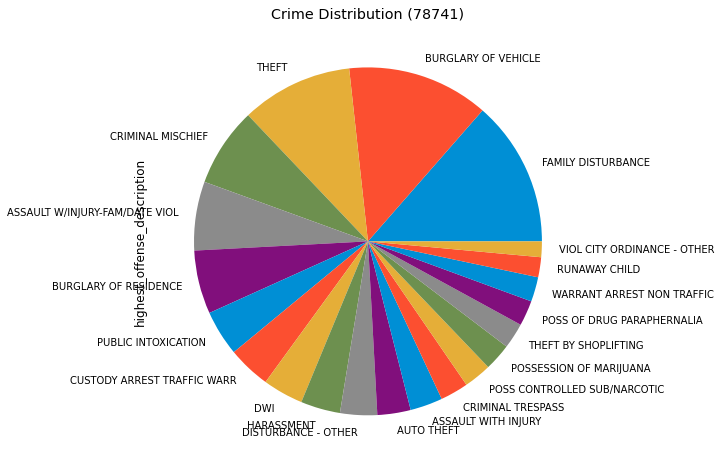

In [12]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
print(df_41_off)
print("----------------------------------")
print(df_41.highest_offense_description.value_counts(normalize=True).head(21))
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

FAMILY DISTURBANCE                14984
BURGLARY OF VEHICLE               14754
THEFT                             13590
CRIMINAL MISCHIEF                  8537
BURGLARY OF RESIDENCE              5872
ASSAULT W/INJURY-FAM/DATE VIOL     5765
HARASSMENT                         5156
DISTURBANCE - OTHER                4531
DWI                                4425
PUBLIC INTOXICATION                4000
CUSTODY ARREST TRAFFIC WARR        3248
BURGLARY NON RESIDENCE             2877
AUTO THEFT                         2863
ASSAULT WITH INJURY                2675
RUNAWAY CHILD                      2604
POSSESSION OF MARIJUANA            2592
WARRANT ARREST NON TRAFFIC         2108
POSS CONTROLLED SUB/NARCOTIC       2024
THEFT BY SHOPLIFTING               1993
CRIMINAL TRESPASS                  1959
IDENTITY THEFT                     1590
POSS OF DRUG PARAPHERNALIA         1520
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.0

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

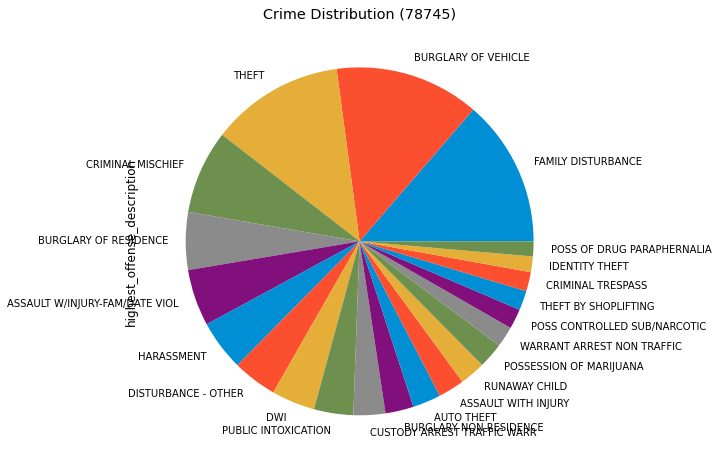

In [13]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
print(df_45_off)
print("----------------------------------")
print(df_45.highest_offense_description.value_counts(normalize=True).head(22))
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

BURGLARY OF VEHICLE               8639
THEFT                             5618
CRIMINAL MISCHIEF                 4976
THEFT OF BICYCLE                  3493
PUBLIC INTOXICATION               2628
BURGLARY OF RESIDENCE             2123
WARRANT ARREST NON TRAFFIC        1550
CRIMINAL TRESPASS                 1352
AUTO THEFT                        1321
ASSAULT WITH INJURY               1255
HARASSMENT                        1219
DWI                               1215
FAMILY DISTURBANCE                1196
DISTURBANCE - OTHER               1119
BURGLARY NON RESIDENCE             881
CRIMINAL TRESPASS/TRANSIENT        868
VIOL CITY ORDINANCE - OTHER        791
CUSTODY ARREST TRAFFIC WARR        782
GRAFFITI                           780
ASSAULT W/INJURY-FAM/DATE VIOL     694
POSSESSION OF MARIJUANA            658
ASSAULT BY CONTACT                 620
Name: highest_offense_description, dtype: int64

'----------------------------------'

BURGLARY OF VEHICLE               0.150700
THEFT                             0.098001
CRIMINAL MISCHIEF                 0.086802
THEFT OF BICYCLE                  0.060932
PUBLIC INTOXICATION               0.045843
BURGLARY OF RESIDENCE             0.037034
WARRANT ARREST NON TRAFFIC        0.027038
CRIMINAL TRESPASS                 0.023584
AUTO THEFT                        0.023044
ASSAULT WITH INJURY               0.021892
HARASSMENT                        0.021264
DWI                               0.021195
FAMILY DISTURBANCE                0.020863
DISTURBANCE - OTHER               0.019520
BURGLARY NON RESIDENCE            0.015368
CRIMINAL TRESPASS/TRANSIENT       0.015141
VIOL CITY ORDINANCE - OTHER       0.013798
CUSTODY ARREST TRAFFIC WARR       0.013641
GRAFFITI                          0.013606
ASSAULT W/INJURY-FAM/DATE VIOL    0.012106
POSSESSION OF MARIJUANA           0.011478
ASSAULT BY CONTACT                0.010815
Name: highest_offense_description, dtype: float64

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

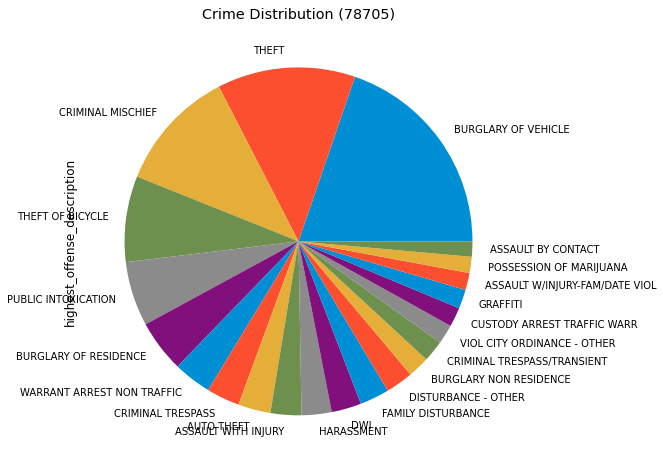

In [14]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off)
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22))
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

BURGLARY OF VEHICLE               5389
THEFT                             5090
THEFT BY SHOPLIFTING              2544
CRIMINAL MISCHIEF                 1275
DWI                                881
FAMILY DISTURBANCE                 760
VIOL CITY ORDINANCE - OTHER        652
HARASSMENT                         626
AUTO THEFT                         607
BURGLARY OF RESIDENCE              521
THEFT FROM PERSON                  462
DISTURBANCE - OTHER                433
IDENTITY THEFT                     429
BURGLARY NON RESIDENCE             357
ASSAULT W/INJURY-FAM/DATE VIOL     340
CRED CARD ABUSE - OTHER            326
PUBLIC INTOXICATION                320
POSSESSION OF MARIJUANA            298
FRAUD - OTHER                      280
SUSPICIOUS PERSON                  256
CUSTODY ARREST TRAFFIC WARR        247
WARRANT ARREST NON TRAFFIC         223
ASSAULT WITH INJURY                198
VIOL WATER SAFETY ACT              195
Name: highest_offense_description, dtype: int64

BURGLARY OF VEHICLE               0.191174
THEFT                             0.180567
THEFT BY SHOPLIFTING              0.090248
CRIMINAL MISCHIEF                 0.045230
DWI                               0.031253
FAMILY DISTURBANCE                0.026961
VIOL CITY ORDINANCE - OTHER       0.023130
HARASSMENT                        0.022207
AUTO THEFT                        0.021533
BURGLARY OF RESIDENCE             0.018482
THEFT FROM PERSON                 0.016389
DISTURBANCE - OTHER               0.015361
IDENTITY THEFT                    0.015219
BURGLARY NON RESIDENCE            0.012665
ASSAULT W/INJURY-FAM/DATE VIOL    0.012061
CRED CARD ABUSE - OTHER           0.011565
PUBLIC INTOXICATION               0.011352
POSSESSION OF MARIJUANA           0.010571
FRAUD - OTHER                     0.009933
SUSPICIOUS PERSON                 0.009082
CUSTODY ARREST TRAFFIC WARR       0.008762
WARRANT ARREST NON TRAFFIC        0.007911
ASSAULT WITH INJURY               0.007024
VIOL WATER 

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

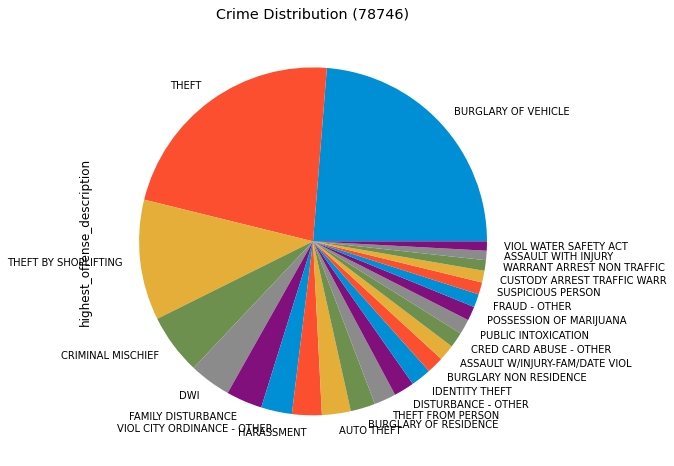

In [15]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off)
display(df_46.highest_offense_description.value_counts(normalize=True).head(24))
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [16]:
# Creating separate dataframes for overall & violent crime
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

78741.0    0.130726
78753.0    0.099040
78758.0    0.094412
78701.0    0.074433
78723.0    0.074399
78702.0    0.074195
78745.0    0.057722
78752.0    0.052379
78744.0    0.052039
78704.0    0.048397
78721.0    0.027976
78724.0    0.024539
78705.0    0.021442
78757.0    0.020727
78748.0    0.017494
78751.0    0.017085
78759.0    0.013580
78722.0    0.009462
78754.0    0.008338
78727.0    0.007998
78749.0    0.007828
78617.0    0.007726
78729.0    0.007079
78750.0    0.005684
78731.0    0.005275
Name: zip_code, dtype: float64

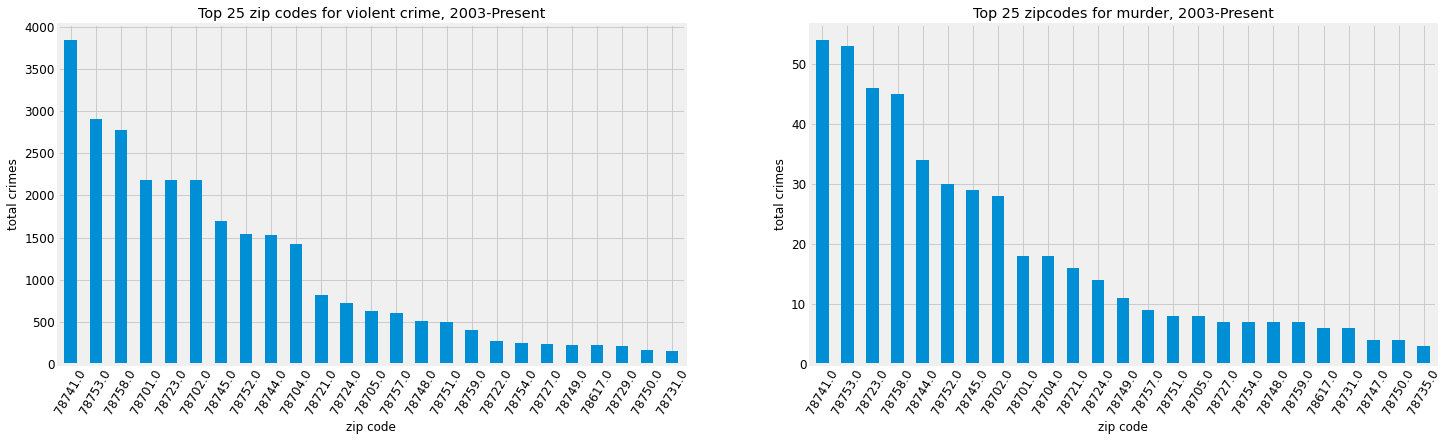

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
zip_code,,,,,
78610.0,1,0,0,0,0
78613.0,15,11,0,1,6
78617.0,122,62,0,6,37
78621.0,1,0,0,0,0
78634.0,1,0,0,0,0
78652.0,2,0,0,0,0
78653.0,10,3,0,1,1
78660.0,65,28,0,2,17
78664.0,3,0,0,0,0


<Figure size 432x288 with 0 Axes>

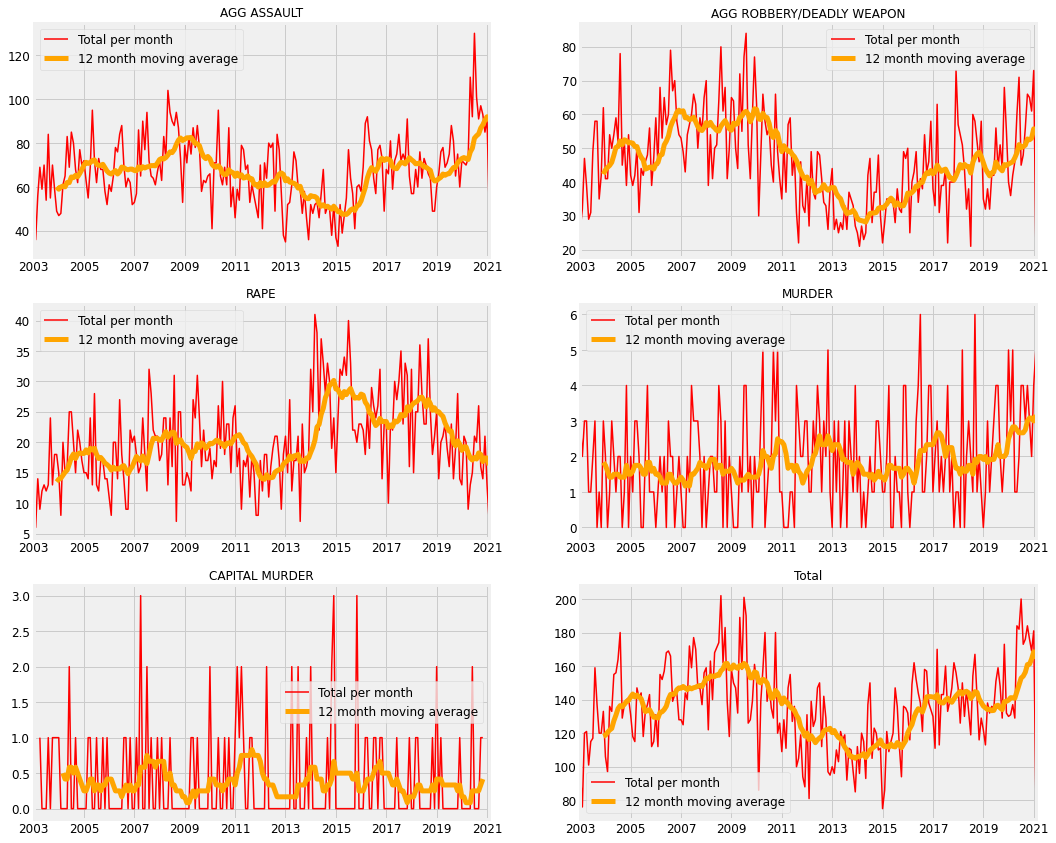

In [17]:
display(df_viol.zip_code.value_counts(normalize=True).head(25))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGG ASSAULT"]
    .resample("M")
    .size()
)
monthly.columns = ["AGG ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly["Total"] = monthly.sum(axis=1)

crimeTypes = monthly.columns

plt.figure(1)
plt.figure(figsize=(16, 25))

i = 521
for eachCrime in crimeTypes:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

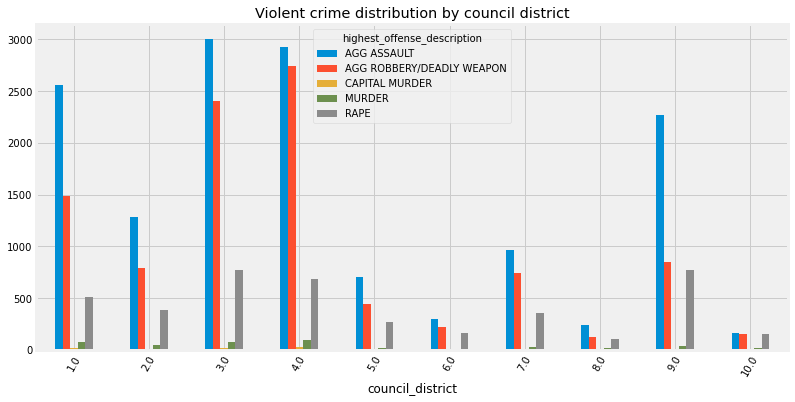

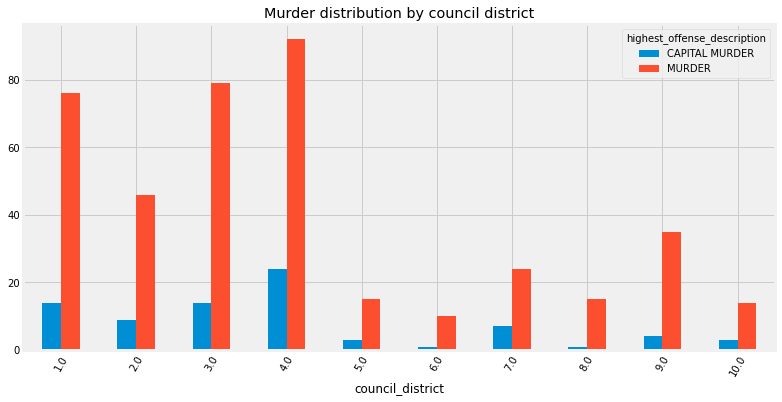

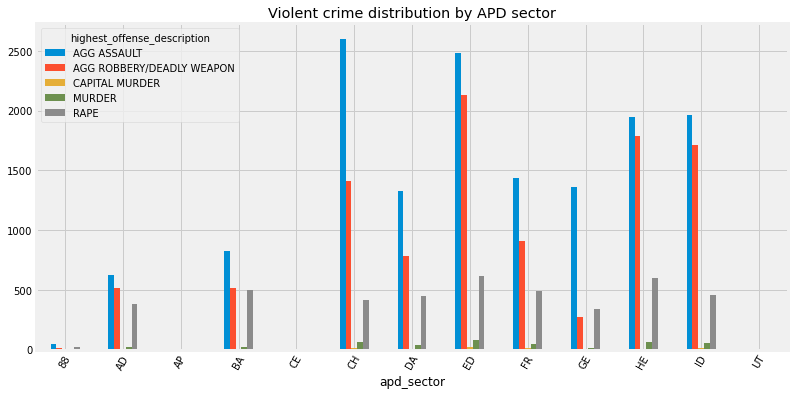

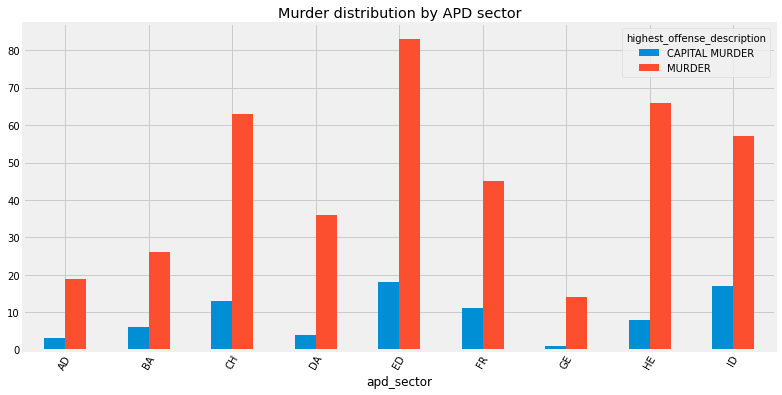

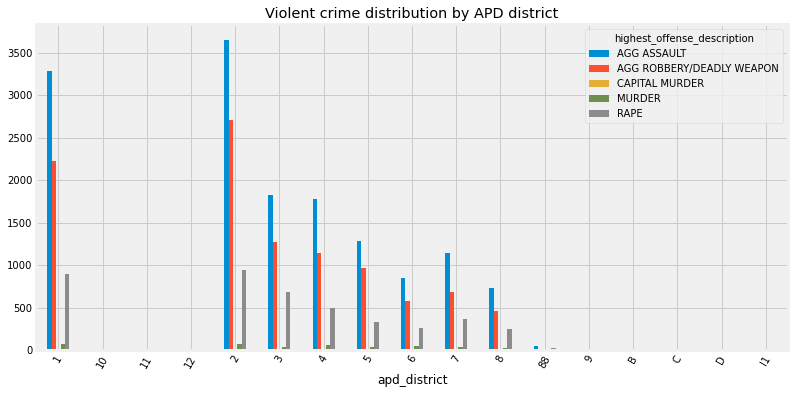

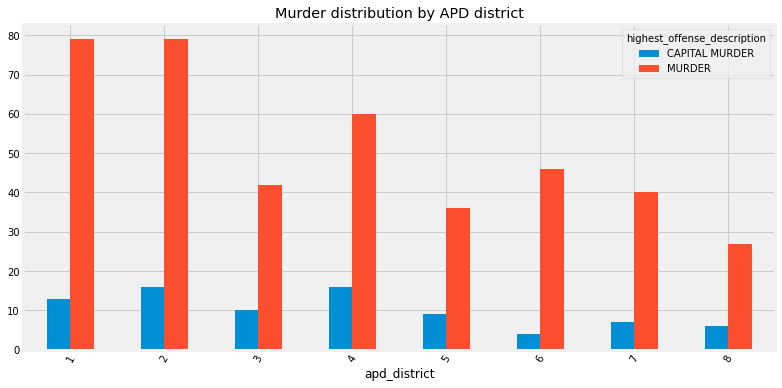

In [18]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(figsize=(12, 6), rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD district"
)
plt.show()

### K. Violent crime and murder distribution by location type

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
location_type,,,,,
ABANDONED/CONDEMNED STRUCTURE,13,7,0,1,4
AMUSEMENT PARK,0,2,0,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,2,0,0,0,0
ATM SEPARATE FROM BANK,1,3,0,0,0
AUTO DEALERSHIP NEW / USED,10,2,0,0,1
BANKS / SAVINGS & LOAN,5,134,0,1,1
BAR / NIGHT CLUB,657,46,2,7,78
CAMP / CAMPGROUND,21,2,0,0,3
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,20,5,1,0,7


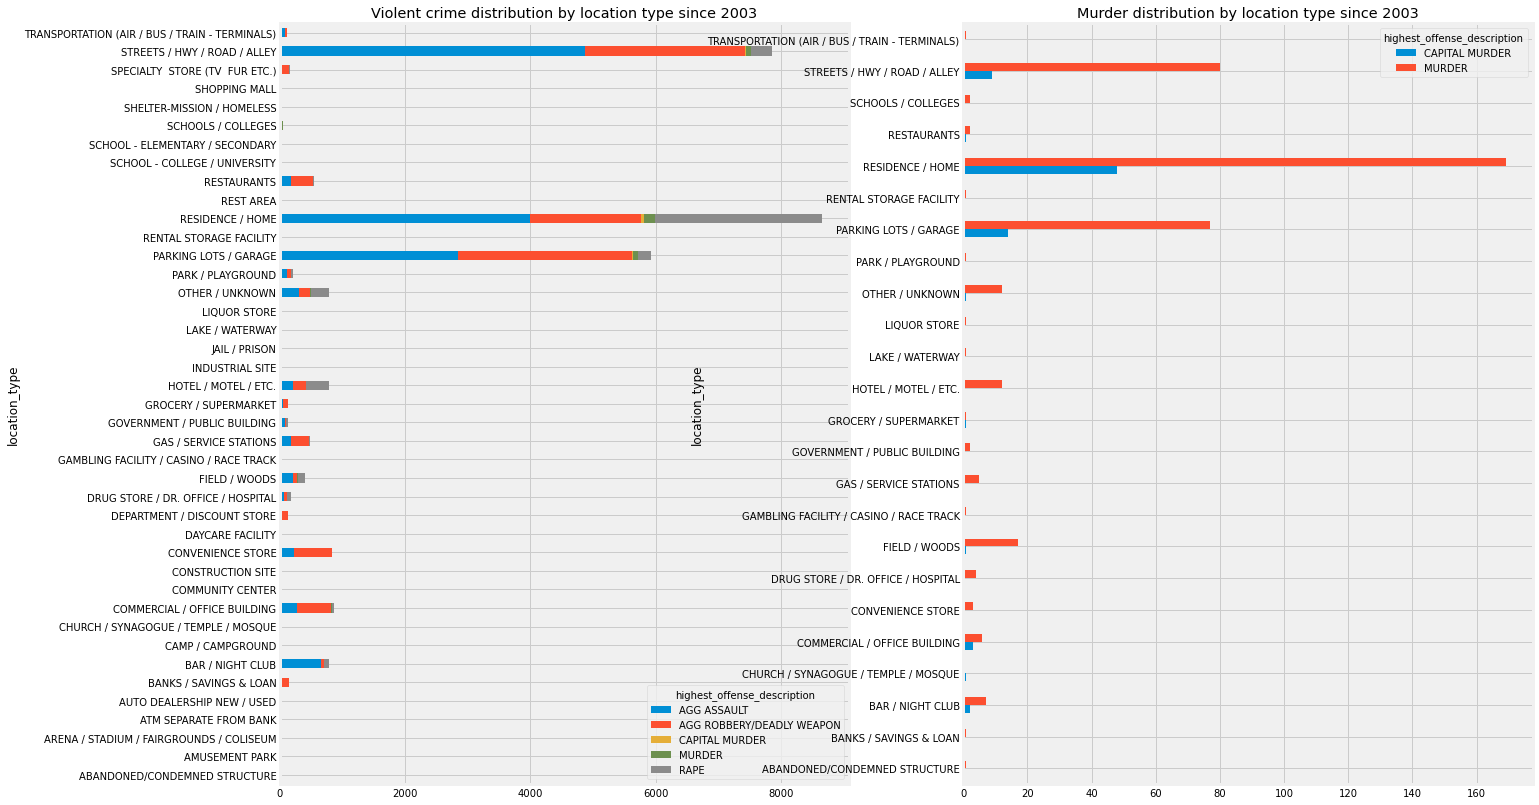

In [19]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003",
    ax=axs[0],
    stacked=True,
)
mur_loc.plot.barh(title="Murder distribution by location type since 2003", ax=axs[1])
plt.show()

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [20]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [21]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [22]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [23]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13)

500 E 7TH ST                83
9515 N LAMAR BLVD           66
1700 BURTON DR              63
6409 SPRINGDALE RD          59
00 BLOCK UNKNOWN            59
9601 MIDDLE FISKVILLE RD    58
900 BLOCK E 32ND ST         55
9200 NORTH PLZ              53
1030 NORWOOD PARK BLVD      53
1071 CLAYTON LN             53
2237 E RIVERSIDE DR         51
1137 GUNTER ST              51
1124 RUTLAND DR             50
Name: address, dtype: int64

In [24]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30)

8800 N IH 35 SVRD SB         3
4700 E RIVERSIDE DR          3
6407 SPRINGDALE RD           3
8610 N LAMAR BLVD            3
6409 SPRINGDALE RD           3
201 W 5TH ST                 2
6118 FAIRWAY ST              2
815 W SLAUGHTER LN           2
1711 RUTLAND DR              2
744 W WILLIAM CANNON DR      2
10610 MORADO CIR             2
605 MASTERSON PASS           2
8225 SAM RAYBURN DR          2
8912 N LAMAR BLVD            2
2915 S IH 35 SVRD NB         2
2400 WICKERSHAM LN           2
2713 S CONGRESS AVE          2
833 FAIRFIELD DR             2
9010 GALEWOOD DR             2
9220 N IH 35 SVRD SB         2
2501 ANKEN DR                2
10503 N LAMAR BLVD           2
7000 DECKER LN               2
1050 SPRINGDALE RD           2
601 E 15TH ST                2
9601 MIDDLE FISKVILLE RD     2
6600 ED BLUESTEIN BLVD SB    2
9200 NORTH PLZ               2
1137 GUNTER ST               2
2508 E RIVERSIDE DR          2
Name: address, dtype: int64

In [25]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")